<a href="https://colab.research.google.com/github/zyntonyson/Curso-introductorio-Python/blob/master/09_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Cargar key API para obtener acceso al dataset
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zyntonyson","key":"c0ef469d9714221a5cc899efb3a3e3f1"}'}

In [0]:
# Ubicar key en ubicación esperada
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
# Librerias necesarias
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Avocado Prices Dataset

## Data Visualization

##Historical data on avocado prices and sales volume in multiple US markets

### Context


It is a well known fact that Millenials LOVE Avocado Toast. It's also a well known fact that all Millenials live in their parents basements.

Clearly, they aren't buying home because they are buying too much Avocado Toast!

But maybe there's hope... if a Millenial could find a city with cheap avocados, they could live out the Millenial American Dream.

### Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website:

> The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold
Acknowledgements
Many thanks to the Hass Avocado Board for sharing this data!!

http://www.hassavocadoboard.com/retail/volume-and-price-data

### Inspiration

In which cities can millenials have their avocado toast AND buy a home?

Was the Avocadopocalypse of 2017 real?


Source: https://www.kaggle.com/neuromusic/avocado-prices

In [0]:
# Bajar dataset from kaggle
!kaggle datasets download -d neuromusic/avocado-prices

  0% 0.00/629k [00:00<?, ?B/s]
100% 629k/629k [00:00<00:00, 42.1MB/s]


In [0]:



df_avocado = pd.read_csv('avocado-prices.zip', compression='zip', header=0, sep=',', quotechar='"')

In [0]:
df_avocado.shape

(18249, 14)

In [0]:
df_avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


## Análisis exploratorio

In [0]:
df_avocado.head(4)


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany


In [0]:
df_avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [0]:
# dropping null value columns to avoid errors 
df_avocado.dropna(inplace = True) 

In [0]:
df_avocado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [0]:
# Delete useless col
df_avocado.drop('Unnamed: 0', inplace=True, axis=1)


In [0]:
#  Visualizacion de datos
df_avocado.head()


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [0]:
# Split cells (tidy data)

temp= df_avocado['Date'].str.split('-', n = 3, expand = True)
df_avocado['Year']= temp[0]
df_avocado.loc[:,'Year']=df_avocado.Year.astype(np.float)
df_avocado['Month']= temp[1]
df_avocado['Day']= temp[2]
df_avocado.drop('Date', inplace=True, axis=1)
df_avocado.drop('year', inplace=True, axis=1)

In [0]:
df_avocado.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015.0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015.0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015.0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015.0,12,06
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015.0,11,29


In [0]:
#reorder cols

col_avocado=df_avocado.columns.tolist()
new_order_col=col_avocado[11:] +col_avocado[ :11]
df_avocado= df_avocado[new_order_col]


In [0]:
df_avocado.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'region', 'Year',
       'Month', 'Day'],
      dtype='object')

In [0]:
df_avocado.head()

,Year,Month,Day,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,2015.0,12,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,2015.0,12,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,2015.0,12,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,2015.0,12,06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,2015.0,11,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


¿ Qué tipo de aguacate es más vendido?

In [0]:
#Proporción de tipos de avocado

Type=df_avocado.groupby('type').agg({'Total Volume':'sum'})
Type


,Total Volume
type,
conventional,1.508722e+10
organic,4.361817e+08


In [0]:
df_avocado.groupby('type')

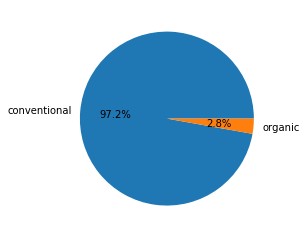

In [0]:
# Ver en un piechart

values=Type['Total Volume'].tolist()
labels=['conventional','organic']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels,autopct='%1.1f%%')
plt.show()

¿Cuál es la variación por año?

In [0]:
year_values_unique=df_avocado.Year.unique()
year_values_unique

array([2015., 2016., 2017., 2018.])

In [0]:
Year_variation=df_avocado.groupby('Year').agg({'Total Volume':'sum'})
values_year_avocado=Year_variation['Total Volume'].tolist()

<BarContainer object of 4 artists>

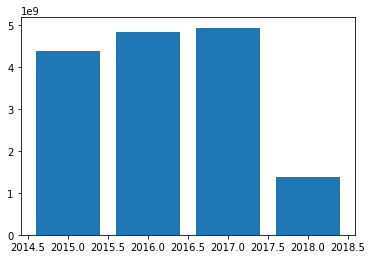

In [0]:
plt.bar(year_values_unique,values_year_avocado)

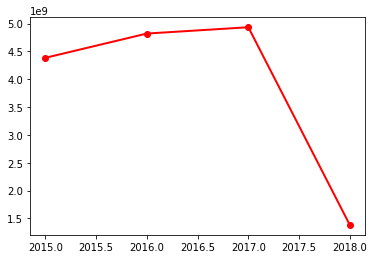

In [0]:
plt.plot(year_values_unique,values_year_avocado,'ro-', linewidth=2)

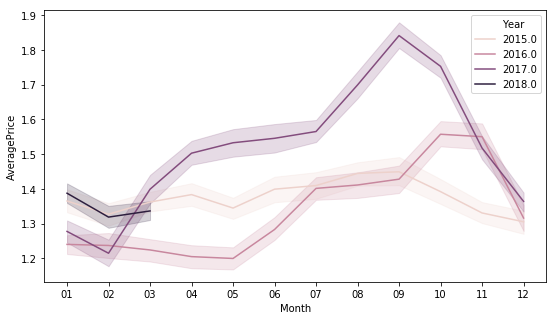

In [0]:
plt.figure(figsize=(9,5))
sns.lineplot(x="Month", y="AveragePrice", hue='Year',  data=df_avocado)
plt.show()

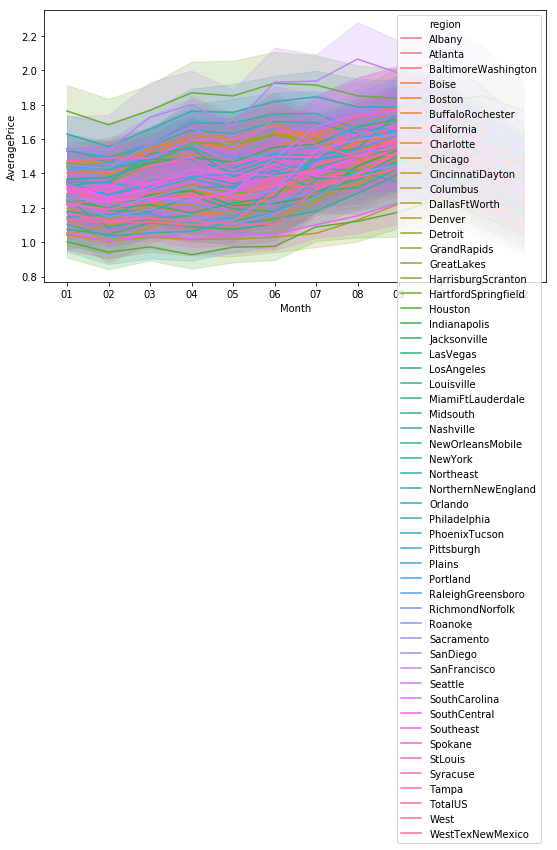

In [0]:
plt.figure(figsize=(9,5))
sns.lineplot(x="Month", y="AveragePrice", hue='region',  data=df_avocado)
plt.show()

¿Cuál es el comportamiento probabilistico del precio promedio?

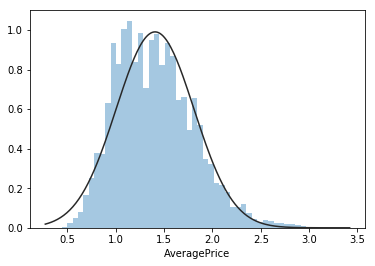

In [0]:
from scipy.stats import norm
sns.distplot(a=df_avocado.AveragePrice, kde=False, fit=norm)

¿Cómo varia el precio a lo largo del año?

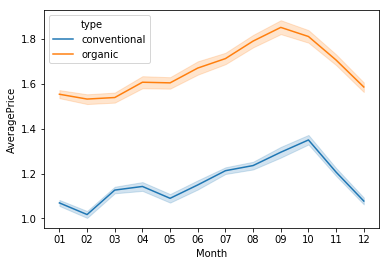

In [0]:
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df_avocado)
plt.show()

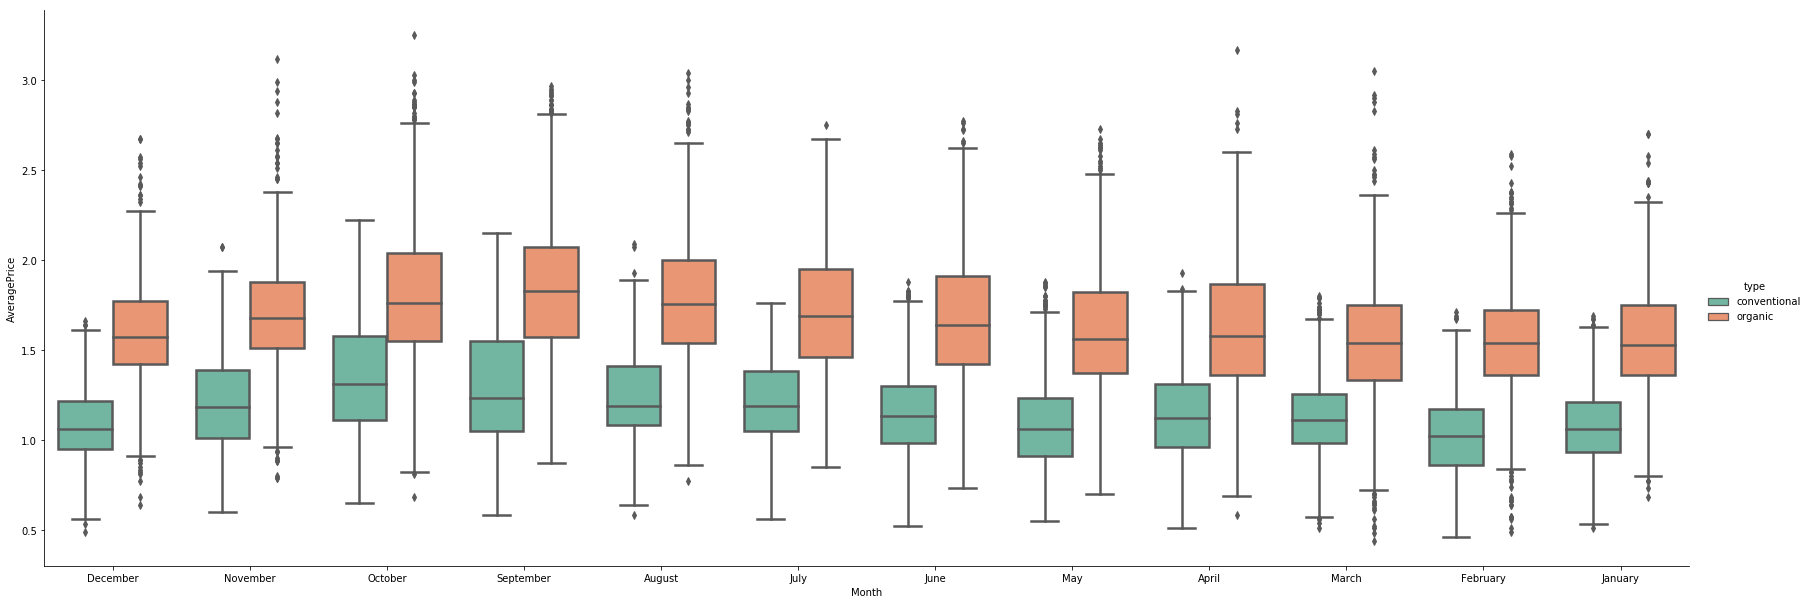

In [0]:
df_avocado['Month'] = df_avocado['Month'].replace({'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May', 
                                   '06': 'June', '07': 'July', '08': 'August', '09': 'September', '10': 'October', 
                                   '11': 'November', '12': 'December'})


sns.catplot(x="Month", y="AveragePrice", hue="type", 
            kind="box", data=df_avocado, height=8.5, linewidth=2.5, aspect=2.8,palette="Set2")

In [0]:
df_avocado.columns

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


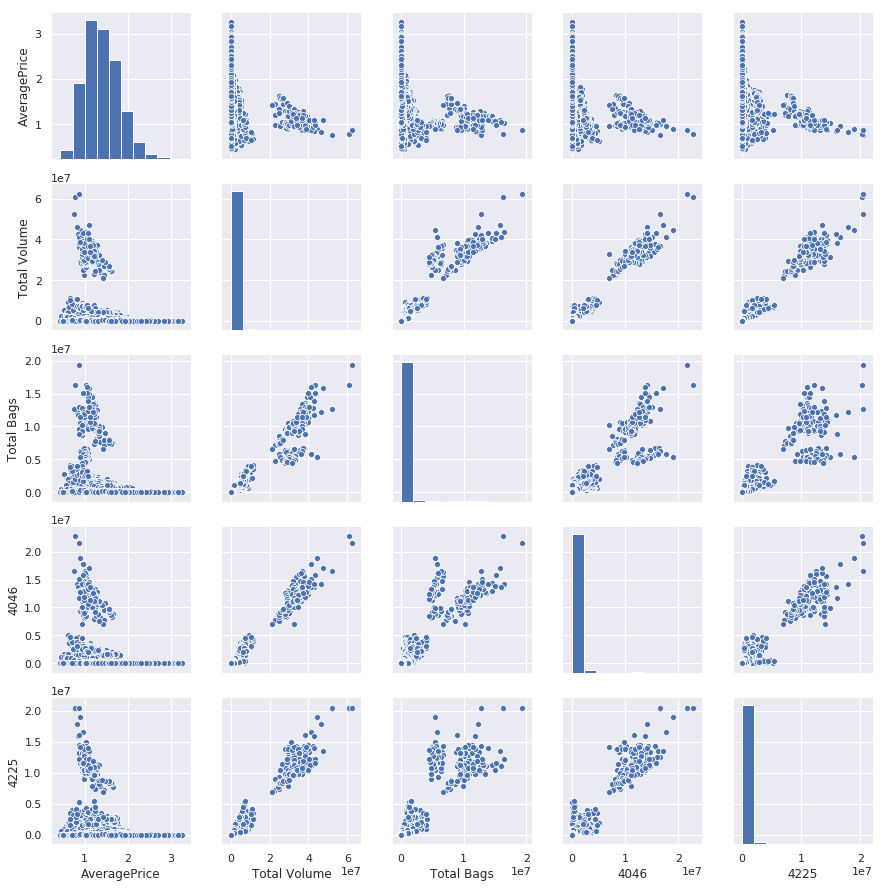

In [0]:
sns.set()
cols = ['AveragePrice', 'Total Volume', 'Total Bags', '4046', '4225']
sns.pairplot(df_avocado[cols], size = 2.5)
plt.show();

¿Qué datos relevantes puedes extraer que relacionen la región, o el volumen de venta de las demás variedades?

# Iris dataset
## Unsupervised Learning

### PCA

In [0]:

from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA


In [0]:
iris = datasets.load_iris()
df_iris=pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [0]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

([], <a list of 0 Text yticklabel objects>)

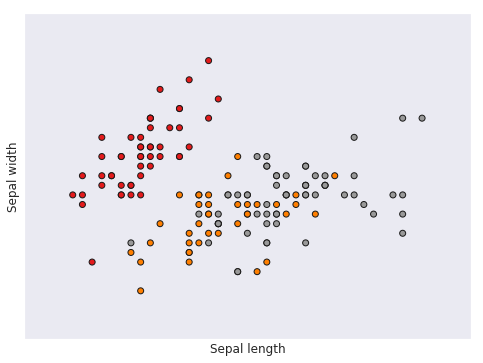

In [0]:
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())


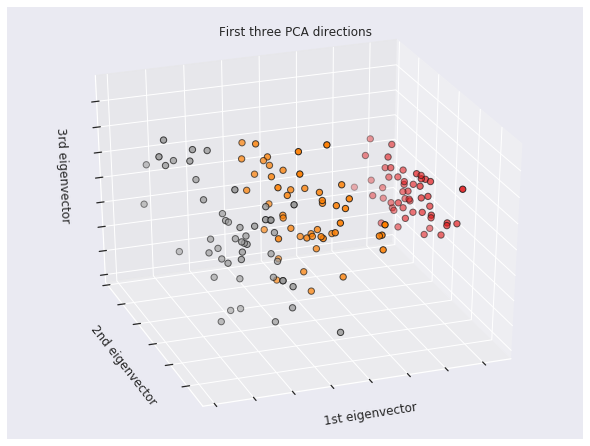

In [0]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [0]:
clf=PCA(0.98,whiten=True)
clf.fit(iris.data)


PCA(copy=True, iterated_power='auto', n_components=0.98, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

In [0]:
clf.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143]])

### Clustering

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


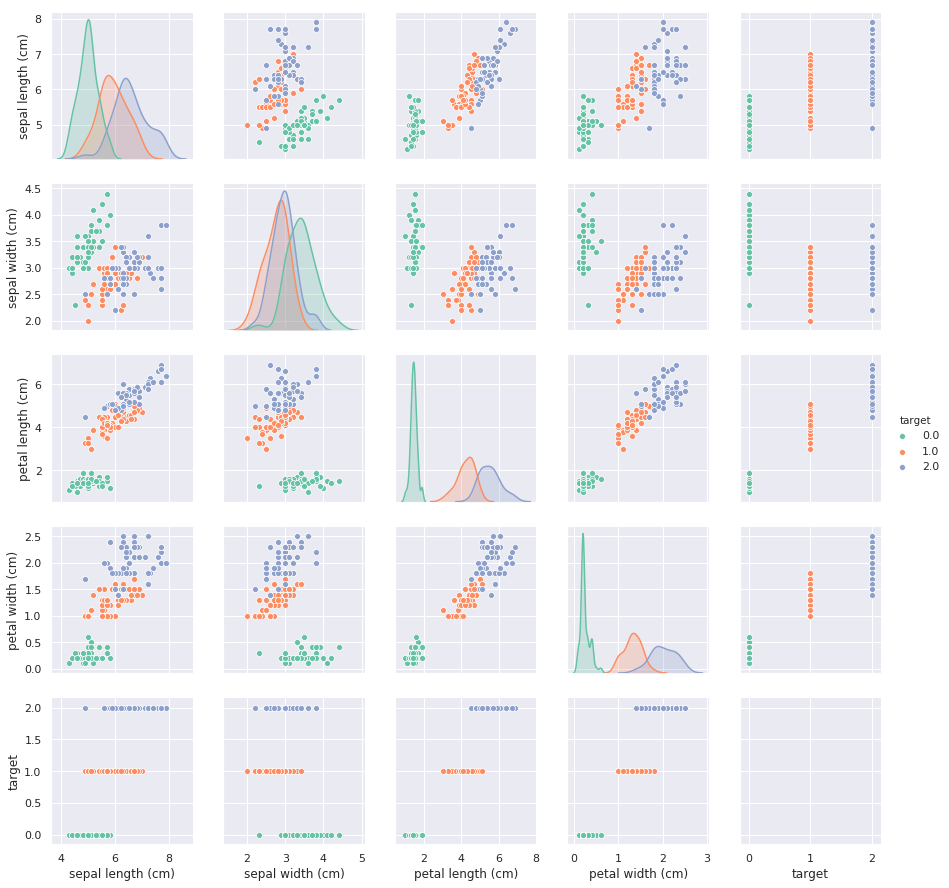

In [0]:
sns.pairplot(data=df_iris,hue="target",palette="Set2")
plt.show()

In [0]:
features=df_iris.iloc[::,:4]
features.head()
features.columns=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]


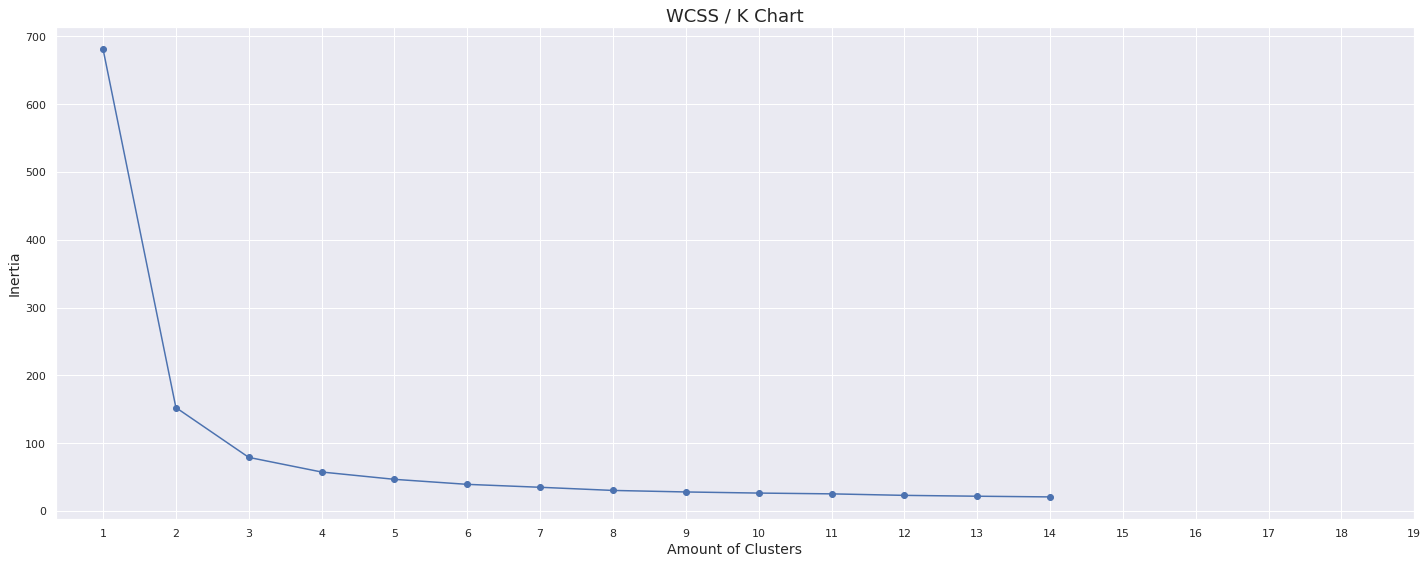

In [0]:
# Screeplot  (elbow rule)
from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(20,8))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

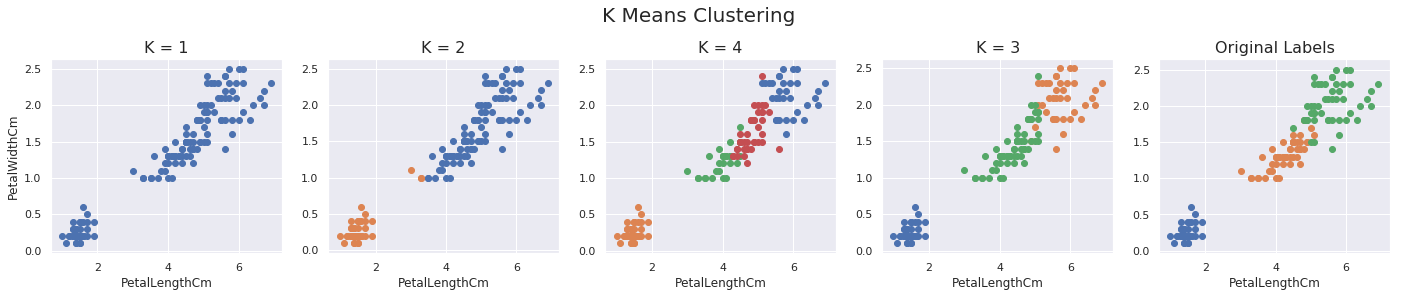

In [0]:
plt.figure(figsize=(24,4))

plt.suptitle("K Means Clustering",fontsize=20)


plt.subplot(1,5,1)
plt.title("K = 1",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.scatter(features.PetalLengthCm ,features.PetalWidthCm)


plt.subplot(1,5,2)
plt.title("K = 2",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=2)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,4)
plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=3)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,3)
plt.title("K = 4",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=4)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])
plt.scatter(features.PetalLengthCm[features.labels == 3],features.PetalWidthCm[features.labels == 3])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,5)
plt.title("Original Labels",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(df_iris['petal length (cm)'][df_iris.target == 0],df_iris['petal width (cm)'][df_iris.target == 0])
plt.scatter(df_iris['petal length (cm)'][df_iris.target == 1],df_iris['petal width (cm)'][df_iris.target == 1])
plt.scatter(df_iris['petal length (cm)'][df_iris.target == 2],df_iris['petal width (cm)'][df_iris.target == 2])

plt.subplots_adjust(top=0.8)
plt.show()

In [0]:
df_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

# USA Housing dataset
## Linear regression

In [0]:

!kaggle datasets download -d gopalchettri/usa-housing

  0% 0.00/363k [00:00<?, ?B/s]
100% 363k/363k [00:00<00:00, 54.9MB/s]


In [0]:
housing_usa = pd.read_csv('usa-housing.zip', compression='zip', header=0, sep=',', quotechar='"')

In [0]:
housing_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [0]:
housing_usa.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


In [0]:
housing_usa.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


# Análisis exploratorio

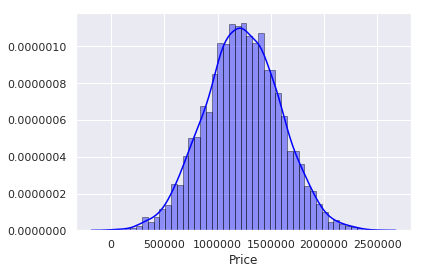

In [0]:
sns.distplot(housing_usa['Price'],hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

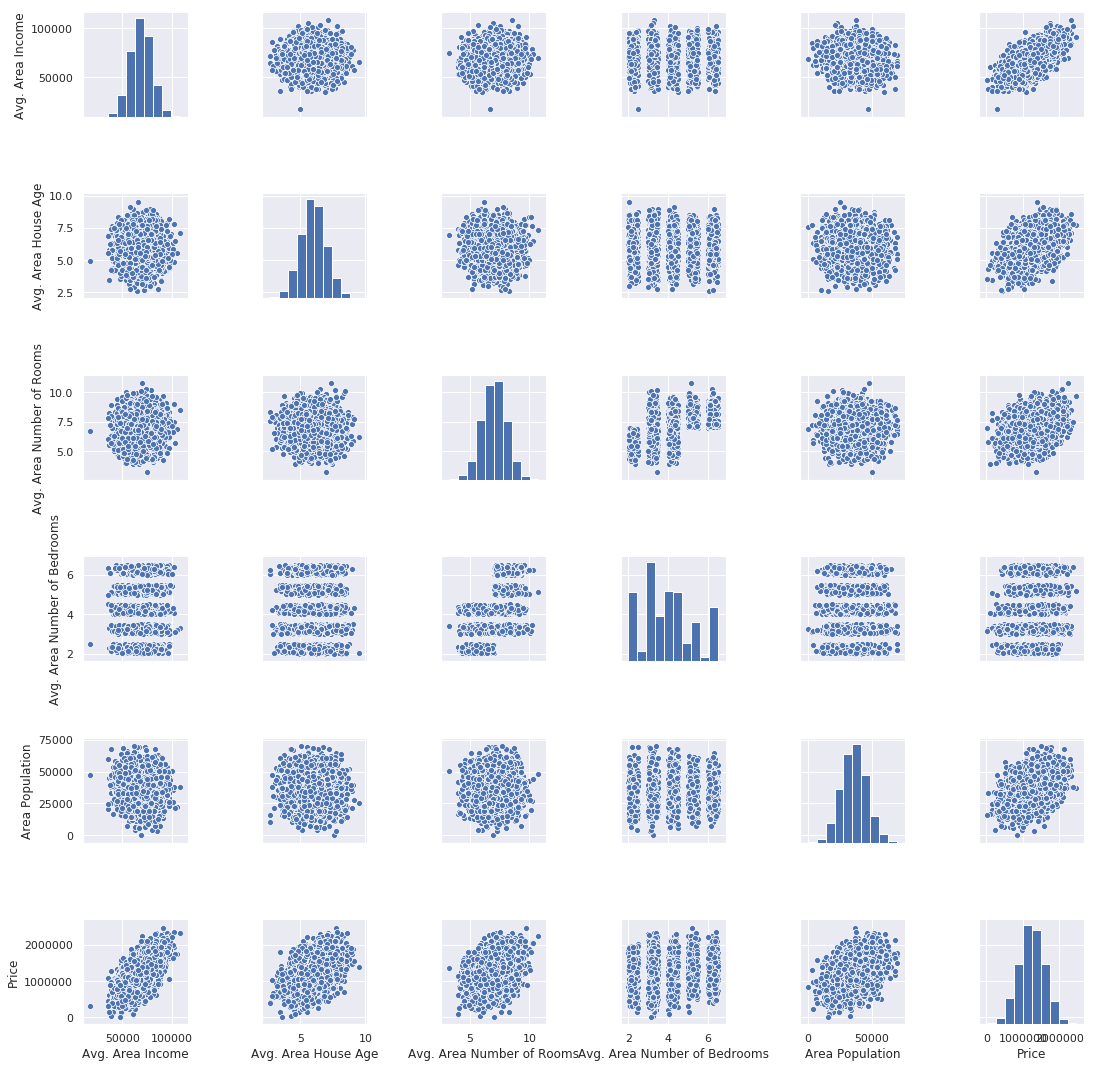

In [0]:
# Visualizar correlaciones

sns.pairplot(housing_usa)

In [0]:
housing_usa.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


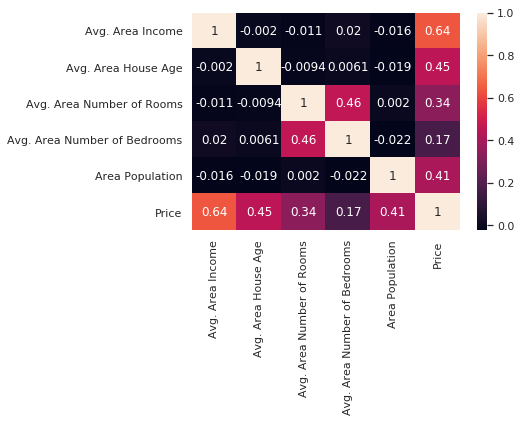

In [0]:
sns.heatmap(housing_usa.corr(), annot = True)

### Training a Linear Regression Model

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



In [0]:
X = housing_usa.iloc[::,:5]
X.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400


In [0]:
Y = housing_usa['Price']
Y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
5       1.068138e+06
6       1.502056e+06
7       1.573937e+06
8       7.988695e+05
9       1.545155e+06
10      1.707046e+06
11      6.637324e+05
12      1.042814e+06
13      1.291332e+06
14      1.402818e+06
15      1.306675e+06
16      1.556787e+06
17      5.284852e+05
18      1.019426e+06
19      1.030591e+06
20      2.146925e+06
21      9.292476e+05
22      7.188872e+05
23      7.439998e+05
24      8.957371e+05
25      1.453975e+06
26      1.125693e+06
27      9.754295e+05
28      1.240764e+06
29      1.577018e+06
            ...     
4970    1.120943e+06
4971    1.111307e+06
4972    1.736402e+06
4973    1.340770e+06
4974    8.013486e+05
4975    1.324382e+06
4976    1.340344e+06
4977    1.518478e+06
4978    1.910585e+06
4979    1.823498e+06
4980    1.406865e+06
4981    1.203850e+06
4982    1.020096e+06
4983    1.194357e+06
4984    1.211900e+06
4985    1.378938e+06
4986    1.260

In [0]:
# Datos de entrenamiento y de prueba

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)


In [0]:
# Modelo
lm_housing=LinearRegression()

In [0]:
# Ajuste del modelo

lm_housing.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#Coeficientes

var=['intercepto']+X.columns.tolist()
params = np.round(np.append(lm_housing.intercept_,lm_housing.coef_),2)
pd.DataFrame(zip(var,params),columns=['Variable','Betas'])


,Variable,Betas
0,intercepto,-2640441.40
1,Avg. Area Income,21.57
2,Avg. Area House Age,165453.04
3,Avg. Area Number of Rooms,120499.84
4,Avg. Area Number of Bedrooms,1999.79
5,Area Population,15.34


### Valorando el modelo

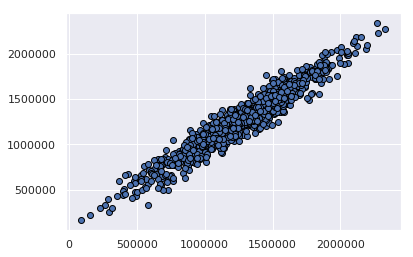

In [0]:
predictions=lm_housing.predict(X_test)
plt.scatter(y_test, predictions, edgecolor='black')

In [0]:
# R cuadrada
lm_housing.score(X_train,y_train)

0.917146624876658

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 81305.23300085647
MSE: 10100187858.864885
RMSE: 100499.69083964829


¿ y los supuestos?...

# Titanic dataset
## Logistic Regression

In [0]:
x_train_titanic=pd.read_csv('https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/titanic_train.csv')
titanic_test=pd.read_csv('https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/titanic_test.csv')


In [0]:
print(x_train_titanic.shape)
print(x_train_titanic.columns)

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [0]:
print(titanic_test.shape)
print(titanic_test.columns)

(418, 11)
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [0]:
# Valores perdidos en los datos de entrenamiento
x_train_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
# Missing values Age
print('Porcentaje de datos perdidos var:AGE %.2f%%' %((x_train_titanic['Age'].isnull().sum()/x_train_titanic.shape[0])*100))

Porcentaje de datos perdidos var:AGE 19.87%


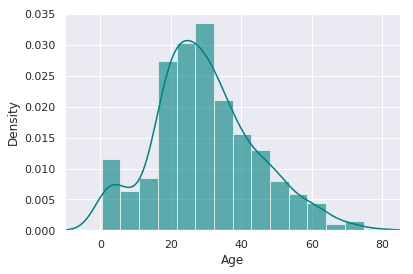

In [0]:
ax = x_train_titanic["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
x_train_titanic["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [0]:
# mean age
print('La media de Age es %.2f' %(x_train_titanic["Age"].mean(skipna=True)))
# median age
print('La mediana de Age es %.2f' %(x_train_titanic["Age"].median(skipna=True)))

La media de Age es 29.70
La mediana de Age es 28.00


In [0]:
# Cabina missing values
print('Porcentaje de datos perdidos var:CABIN %.2f%%' %((x_train_titanic['Cabin'].isnull().sum()/x_train_titanic.shape[0])*100))

Porcentaje de datos perdidos var:CABIN 77.10%


In [0]:
# missing "Embarked" 
print('Porcentaje de datos perdidos var:EMBARKED %.2f%%' %((x_train_titanic['Embarked'].isnull().sum()/x_train_titanic.shape[0])*100))

Porcentaje de datos perdidos var:EMBARKED 0.22%


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


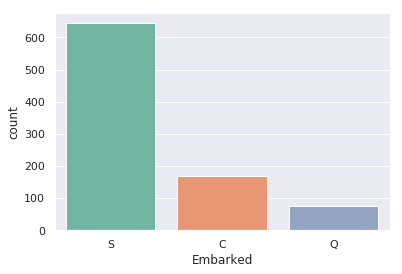

In [0]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(x_train_titanic['Embarked'].value_counts())
sns.countplot(x='Embarked', data=x_train_titanic, palette='Set2')
plt.show()

In [0]:
# Data imputation

train_data = x_train_titanic.copy()
train_data["Age"].fillna(x_train_titanic["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(x_train_titanic['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [0]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [0]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [0]:
# Eliminar variables posiblemente redundantes
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

In [0]:
# Variables dummies y no útiles
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


In [0]:
# Ajustando los datos de prueba

test_data = titanic_test.copy()
test_data["Age"].fillna(x_train_titanic["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(x_train_titanic["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


**Decidiendo predictores**

In [0]:
final_train.columns

Index(['Survived', 'Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')

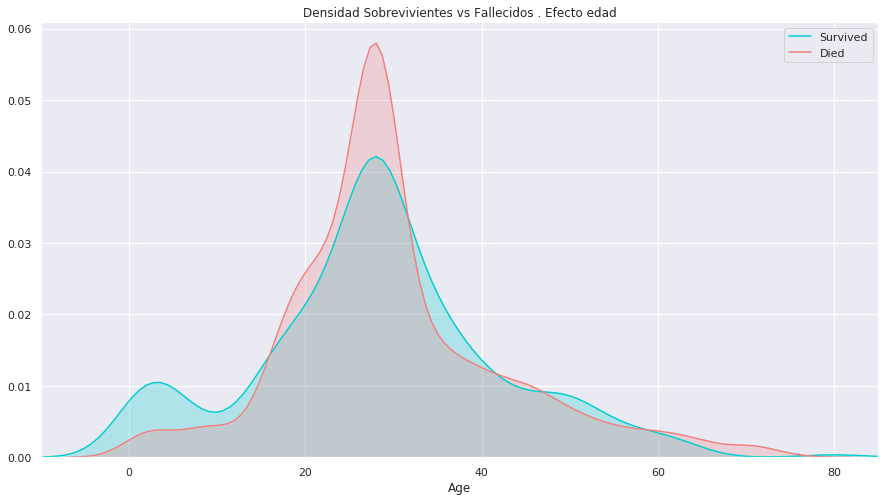

In [0]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Densidad Sobrevivientes vs Fallecidos . Efecto edad')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

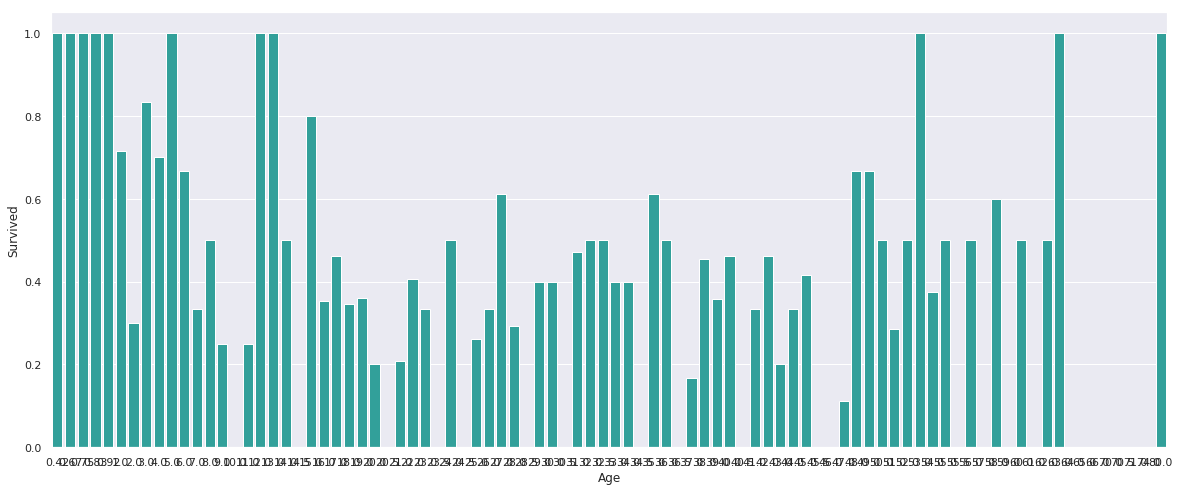

In [0]:
plt.figure(figsize=(20,8))
avg_survival_byage = final_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

In [0]:
final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)

final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

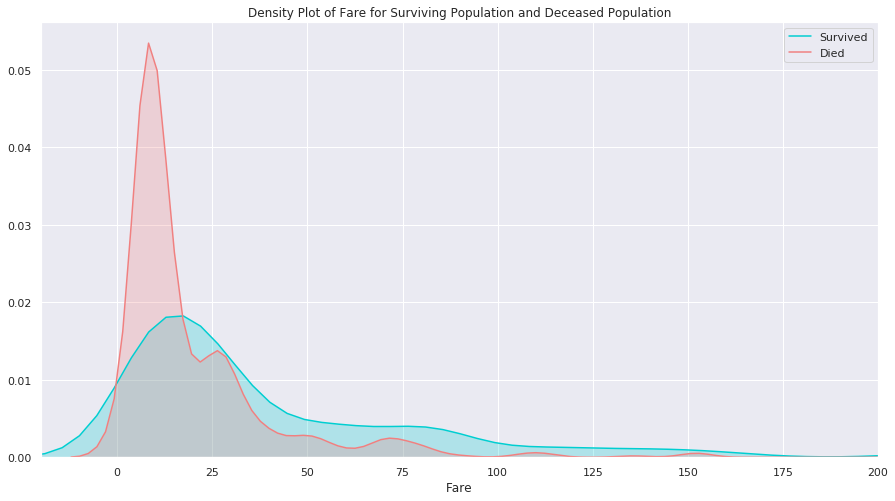

In [0]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

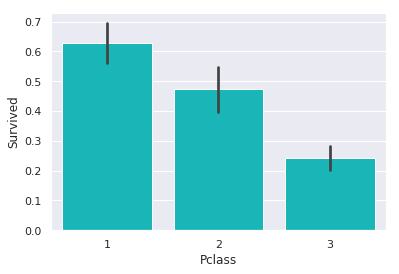

In [0]:
sns.barplot('Pclass', 'Survived', data=x_train_titanic, color="darkturquoise")
plt.show()

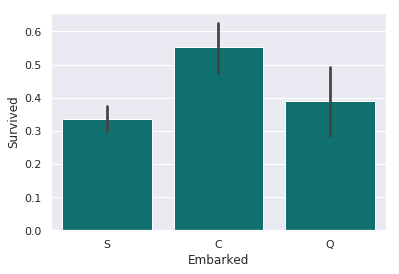

In [0]:
sns.barplot('Embarked', 'Survived', data=x_train_titanic, color="teal")
plt.show()

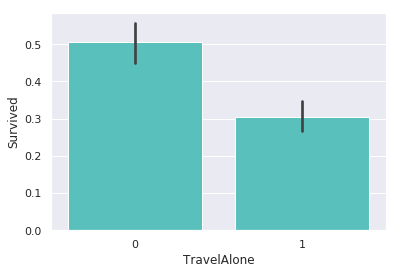

In [0]:
sns.barplot('TravelAlone', 'Survived', data=final_train, color="mediumturquoise")
plt.show()

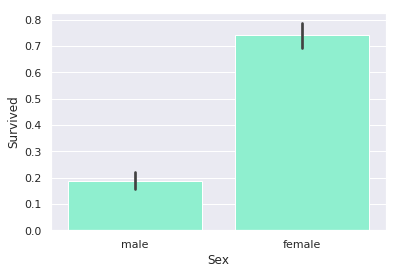

In [0]:
sns.barplot('Sex', 'Survived', data=x_train_titanic, color="aquamarine")
plt.show()

In [0]:
from sklearn.linear_model import LogisticRegression

model_titanic = LogisticRegression(solver = 'liblinear')
model_titanic.fit(final_train.drop('Survived',axis=1),final_train['Survived'])
pred_train=model_titanic.predict(final_train.drop('Survived',axis=1))

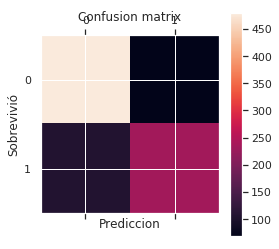

In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(final_train['Survived'],pred_train)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Sobrevivió')
plt.xlabel('Prediccion')
plt.show()

In [0]:
cm

array([[480,  69],
       [107, 235]])

## Referencias:

* https://www.kaggle.com/rishpande/avocado-prices-data-visualization-beginner

* https://www.kaggle.com/gopalchettri/usa-housing-machine-learning-linear-regression/notebook

* https://www.kaggle.com/shrutimechlearn/step-by-step-assumptions-linear-regression

* https://www.kaggle.com/kernels/scriptcontent/2211297/notebook

* https://www.kaggle.com/grapestone5321/sklearn-logistic-regression

* https://www.kaggle.com/efeergun96/unsupervised-learning-on-iris/notebook